In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn')

In [2]:
data = pd.read_csv("https://www.data.gouv.fr/fr/datasets/r/63352e38-d353-4b54-bfd1-f1b3ee1cabd7", sep=';')
#data = data[data['dep'] == '87']
data.tail(5)

,dep,sexe,jour,hosp,rea,rad,dc
4846,974,1,2020-04-02,29,2,11,0
4847,974,2,2020-04-02,25,0,13,0
4848,976,0,2020-04-02,9,3,2,2
4849,976,1,2020-04-02,6,3,1,2
4850,976,2,2020-04-02,3,0,1,0


In [15]:
rea_beds = 9000 # https://www.lemonde.fr/planete/live/2020/04/02/coronavirus-suivez-les-transferts-de-patients-vers-les-hopitaux-de-region-en-direct_6035246_3244.html

In [3]:
meta_data = pd.read_csv("https://www.data.gouv.fr/fr/datasets/r/3f0f1885-25f4-4102-bbab-edec5a58e34a", sep=';')
meta_data

,Colonne,Type,Description_FR,Description_EN,Exemple
0,dep,integer,Département,Department,1
1,sexe,integer,Sexe,Sex,0
2,jour,string($date),Date de notification,Date of notice,18/03/2020
3,hosp,integer,Nombre de personnes actuellement hospitalisées,Number of people currently hospitalized,2
4,rea,integer,Nombre de personnes actuellement en réanimatio...,Number of people currently in resuscitation or...,0
5,rad,integer,Nombre cumulé de personnes retournées à domicile,Total amount of patient that returned home,1
6,dc,integer,Nombre cumulé de personnes décédées à l'hôpital,Total amout of deaths at the hospital,0


In [4]:
#manual_data = pd.DataFrame([[0, 0, "2020-03-31", 22800 , 5565, 7923+1520, 3024+499]], columns=data.columns)
#data = data.append(manual_data)
#data.tail(5)

In [5]:
data_sum = data.groupby(['jour','sexe']).sum().reset_index(level='sexe')
data_sum

,sexe,hosp,rea,rad,dc
jour,,,,,
2020-03-18,0,2972,771,816,218
2020-03-18,1,1685,525,432,121
2020-03-18,2,1248,239,379,96
2020-03-19,0,4073,1002,1180,327
2020-03-19,1,2256,689,580,179
2020-03-19,2,1632,284,562,136
2020-03-20,0,5226,1297,1587,450
2020-03-20,1,2912,905,777,250
2020-03-20,2,2134,362,764,190


In [6]:
data_sum_unisex = data_sum[data_sum['sexe'] == 0]
data_sum_unisex

,sexe,hosp,rea,rad,dc
jour,,,,,
2020-03-18,0,2972,771,816,218
2020-03-19,0,4073,1002,1180,327
2020-03-20,0,5226,1297,1587,450
2020-03-21,0,5900,1453,1811,525
2020-03-22,0,6954,1674,2117,632
2020-03-23,0,8673,2080,2567,860
2020-03-24,0,10176,2516,3281,1100
2020-03-25,0,12072,2935,4085,1388
2020-03-26,0,13879,3351,4947,1696


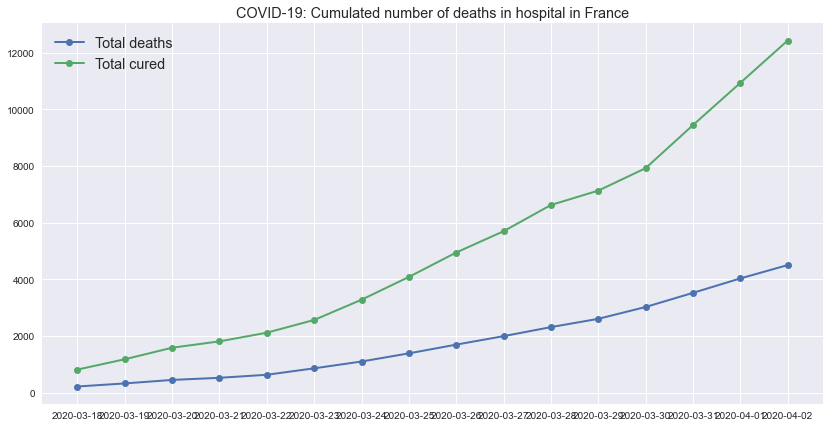

In [7]:
fig, ax = plt.subplots(figsize=(14,7))
plt.plot(data_sum_unisex.index, data_sum_unisex['dc'], label='Total deaths', linewidth=2, marker='o')
plt.plot(data_sum_unisex.index, data_sum_unisex['rad'], label='Total cured', linewidth=2, marker='o')
plt.legend(fontsize='x-large')
ax.set_title('COVID-19: Cumulated number of deaths in hospital in France', fontsize='x-large')
#plt.yscale("log")
plt.show()

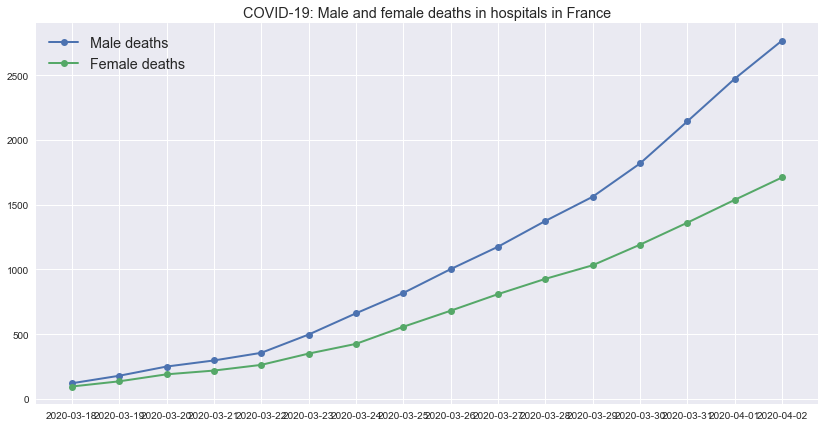

In [8]:
fig, ax = plt.subplots(figsize=(14,7))
data_sum_male = data_sum[data_sum['sexe'] == 1]
data_sum_female = data_sum[data_sum['sexe'] == 2]
plt.plot(data_sum_male.index, data_sum_male['dc'], label='Male deaths', linewidth=2, marker='o')
plt.plot(data_sum_female.index, data_sum_female['dc'], label='Female deaths', linewidth=2, marker='o')
plt.legend(fontsize='x-large')
ax.set_title('COVID-19: Male and female deaths in hospitals in France', fontsize='x-large')
#plt.yscale("log")
plt.show()

In [9]:
data_diff_unisex = data_sum_unisex.diff()
data_diff_unisex

,sexe,hosp,rea,rad,dc
jour,,,,,
2020-03-18,NaN,NaN,NaN,NaN,NaN
2020-03-19,0.0,1101.0,231.0,364.0,109.0
2020-03-20,0.0,1153.0,295.0,407.0,123.0
2020-03-21,0.0,674.0,156.0,224.0,75.0
2020-03-22,0.0,1054.0,221.0,306.0,107.0
2020-03-23,0.0,1719.0,406.0,450.0,228.0
2020-03-24,0.0,1503.0,436.0,714.0,240.0
2020-03-25,0.0,1896.0,419.0,804.0,288.0
2020-03-26,0.0,1807.0,416.0,862.0,308.0


In [10]:
# diff hospitalisés = Nombre d'arrivées - Nombre rad - Nombre dc
arrivees = data_diff_unisex['hosp'] + data_diff_unisex['dc'] + data_diff_unisex['rad']
arrivees

jour
2020-03-18       NaN
2020-03-19    1574.0
2020-03-20    1683.0
2020-03-21     973.0
2020-03-22    1467.0
2020-03-23    2397.0
2020-03-24    2457.0
2020-03-25    2988.0
2020-03-26    2977.0
2020-03-27    2872.0
2020-03-28    3124.0
2020-03-29    2530.0
2020-03-30    2845.0
2020-03-31    3745.0
2020-04-01    3871.0
2020-04-02    3552.0
dtype: float64

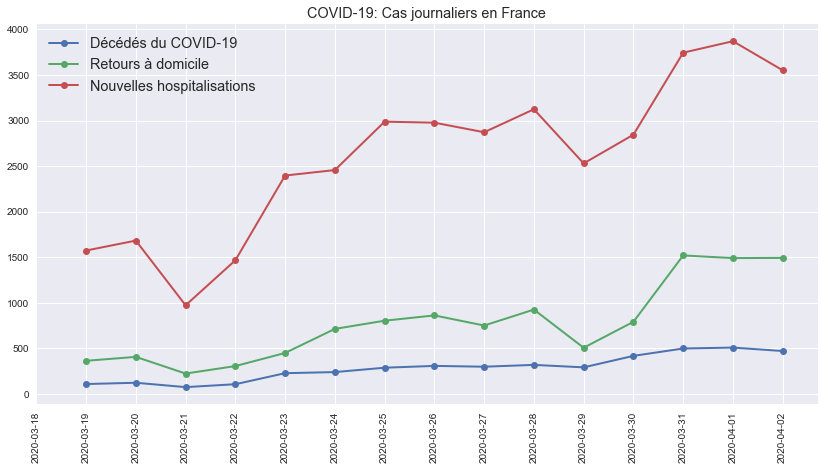

In [27]:
fig, ax = plt.subplots(figsize=(14,7))
plt.plot(data_diff_unisex.index, data_diff_unisex['dc'], label='Décédés du COVID-19', linewidth=2, marker='o')
plt.plot(data_diff_unisex.index, data_diff_unisex['rad'], label='Retours à domicile', linewidth=2, marker='o')
plt.plot(arrivees.index, arrivees.values, label='Nouvelles hospitalisations', linewidth=2, marker='o')
#plt.plot(data_sum_unisex.index, data_sum_unisex['rea'], label='In intensive care', linewidth=2, marker='o')
#plt.plot(data_sum_unisex.index, data_sum_unisex['hosp'], label='In hospital', linewidth=2, marker='o')
plt.legend(fontsize='x-large')
plt.xticks(data_sum_unisex.index, data_sum_unisex.index, rotation='vertical')
ax.set_title('COVID-19: Cas journaliers en France', fontsize='x-large')
#plt.yscale("log")
plt.show()

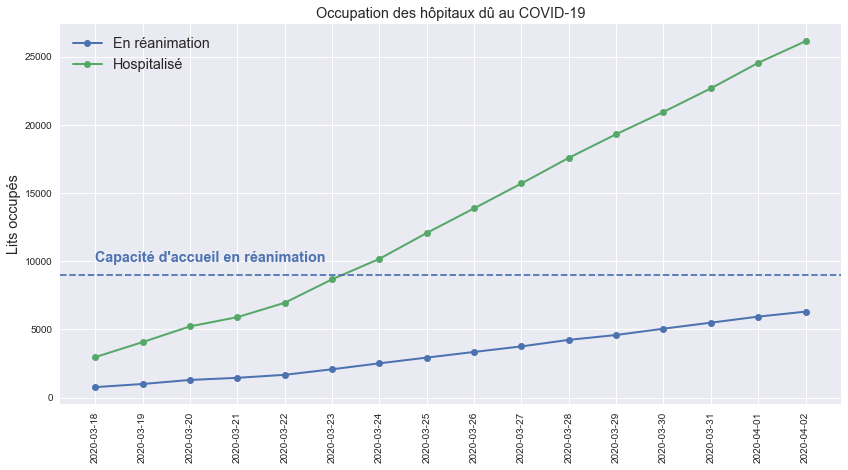

In [26]:
fig, ax = plt.subplots(figsize=(14,7))
plt.plot(data_sum_unisex.index, data_sum_unisex['rea'], label='En réanimation', linewidth=2, marker='o')
plt.plot(data_sum_unisex.index, data_sum_unisex['hosp'], label='Hospitalisé', linewidth=2, marker='o')
plt.legend(fontsize='x-large')
ax.set_title('Occupation des hôpitaux dû au COVID-19', fontsize='x-large')
#plt.yscale("log")
plt.xticks(data_sum_unisex.index, data_sum_unisex.index, rotation='vertical')
plt.axhline(rea_beds, color='C0', linestyle='dashed')
ax.set_ylabel('Lits occupés', fontsize='x-large')
plt.annotate('Capacité d\'accueil en réanimation', (0,rea_beds+1000), color='C0', fontsize='x-large', fontweight='bold')
plt.show()